# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name** - Suryanshu

# **Project Summary -**
The Google Play Store hosts millions of applications across diverse categories, making it highly competitive for developers and challenging for businesses to understand what drives app success. This project focuses on performing Exploratory Data Analysis on Google Play Store application data along with user review data to uncover patterns related to ratings, installs, pricing strategy, categories, and user sentiment.

By analyzing both structured app attributes and unstructured review insights, the project aims to identify the factors that influence user engagement, satisfaction, and overall app performance. The findings will help translate raw data into actionable insights that can guide strategic decisions in app development, marketing, and monetization.

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Despite the vast availability of app data, many developers and businesses lack clarity on what differentiates high performing apps from average or underperforming ones. Questions such as whether higher ratings lead to more installs, how pricing impacts downloads, which categories dominate the market, and how user sentiment aligns with ratings often remain unanswered without structured analysis.

The challenge is to transform raw Play Store data into meaningful insights that explain performance trends and reveal measurable drivers of app success.

#### **Define Your Business Objective?**

The primary business objective is to identify the key factors that influence app success on the Google Play Store.

This includes understanding how variables such as category, rating, reviews, price, size, and sentiment impact installs and user engagement. The goal is to provide data driven recommendations that can help developers optimize their apps, refine pricing strategies, improve user satisfaction, and increase visibility and downloads in a competitive marketplace.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [230]:
# Import Libraries
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [156]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
app_data_path = "/content/drive/MyDrive/playstore_app_analysis_files/Play Store Data.csv"
review_data_path = "/content/drive/MyDrive/playstore_app_analysis_files/User Reviews.csv"
app_data = pd.read_csv(app_data_path)
review_data = pd.read_csv(review_data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [157]:
# Dataset First Look
app_data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [158]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [159]:
# Dataset Rows & Columns count
app_data.shape


(10841, 13)

In [160]:
review_data.shape

(64295, 5)

### Dataset Information

In [161]:
# Dataset Info
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [162]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [163]:
# Dataset Duplicate Value Count
app_data.duplicated().sum()

np.int64(483)

In [164]:
review_data.duplicated().sum()

np.int64(33616)

#### Missing Values/Null Values

In [165]:
# Missing Values/Null Values Count
app_data.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


| Column         | Missing Count | What it Means                                     |
| -------------- | ------------- | ------------------------------------------------- |
| Rating         | 1474          | Apps with installs/reviews but no user rating yet |
| Type           | 1             | Likely a corrupted or incorrectly scraped row     |
| Content Rating | 1             | Missing age classification                        |
| Current Ver    | 8             | Version info not available                        |
| Android Ver    | 3             | Minimum Android version missing                   |


In [166]:
review_data.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


| Column Name                | Description                                                                                 |
| -------------------------- | ------------------------------------------------------------------------------------------- |
| **App**                    | Name of the application for which the review was written                                    |
| **Translated_Review**      | User review text translated into English for analysis                                       |
| **Sentiment**              | Overall sentiment of the review (Positive, Negative, Neutral)                               |
| **Sentiment_Polarity**     | Polarity score of the review ranging from -1 (negative) to +1 (positive)                    |
| **Sentiment_Subjectivity** | Subjectivity score indicating how opinion-based the review is (0 = factual, 1 = subjective) |


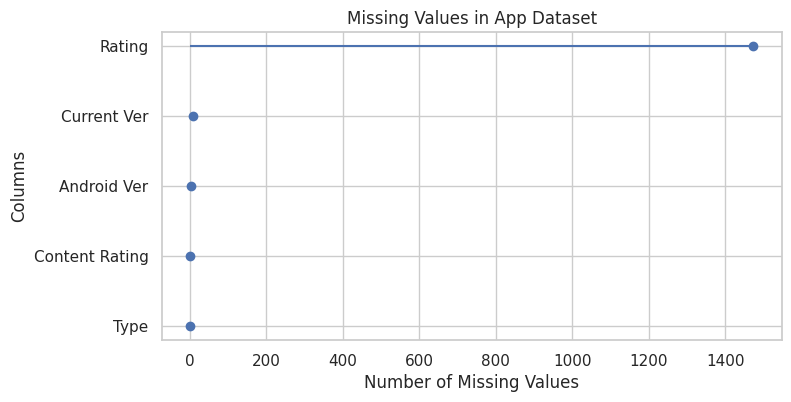

In [167]:
# Calculate missing values
missing_counts = app_data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts = missing_counts.sort_values()

plt.figure(figsize=(8, 4))

# Draw lines
plt.hlines(y=missing_counts.index, xmin=0, xmax=missing_counts.values)

# Draw dots
plt.plot(missing_counts.values, missing_counts.index, "o")

plt.title("Missing Values in App Dataset")
plt.xlabel("Number of Missing Values")
plt.ylabel("Columns")
plt.show()



Text(0, 0.5, 'Number of Records')

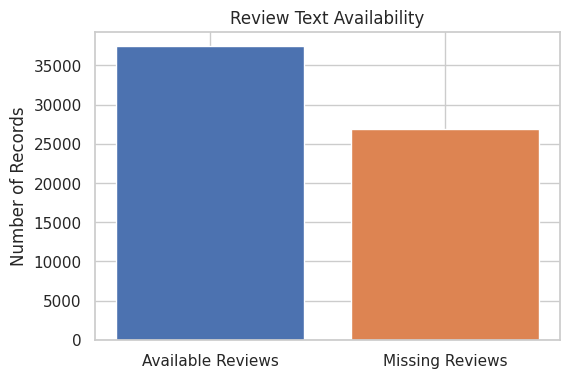

In [168]:
import matplotlib.pyplot as plt

# Total rows
total = len(review_data)

# Missing review text
missing = review_data['Translated_Review'].isnull().sum()

# Non-missing review text
available = total - missing

plt.figure(figsize=(6,4))

plt.bar(['Available Reviews'], [available])
plt.bar(['Missing Reviews'], [missing])

plt.title("Review Text Availability")
plt.ylabel("Number of Records")



### What did you know about your dataset?

Review Dataset – Missing Values Interpretation

The review dataset shows a large number of missing values in sentiment-related columns due to the absence of review text for many apps. Since sentiment, polarity, and subjectivity are derived from textual reviews, this missingness is structural and expected rather than an indicator of poor data quality.

App Dataset – Missing Values Interpretation

The app dataset contains relatively few missing values, primarily in the rating and version-related fields, which is common for newly launched or less-engaged applications. Overall, the missing values are sparse and limited, indicating good data quality suitable for reliable exploratory analysis.

## ***2. Understanding Your Variables***

In [169]:
# Dataset Columns
app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [170]:
review_data.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [171]:
# Dataset Describe
app_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Key Insights

The average rating (~4.19) indicates that most Play Store apps are generally well-rated.

The median rating (4.3) being higher than the mean suggests a slight left skew, with fewer poorly rated apps pulling the average down.

The maximum rating of 19 is invalid, revealing a data quality issue that must be addressed during cleaning.

The majority of apps fall between 4.0 and 4.5, indicating high competition and minimal differentiation based solely on ratings.

In [172]:
review_data.describe()


,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


**Sentiment Polarity**

  The positive mean polarity (~0.18) indicates an overall positive bias
  in user reviews.

  The median polarity being close to zero suggests that many reviews are neutral or mildly positive, rather than strongly opinionated.

**Sentiment Subjectivity**

  The mean subjectivity (~0.49) indicates a balanced mix of factual feedback and personal opinions.

  A wide spread in subjectivity values suggests that users express both objective issues (bugs, performance) and subjective experiences (liking/disliking features).

### Variables Description

### Check Unique Values for each variable.

In [173]:
# Check Unique Values for each variable.
app_data.nunique()

,0
App,9660
Category,34
Rating,40
Reviews,6002
Size,462
Installs,22
Type,3
Price,93
Content Rating,6
Genres,120


In [174]:
review_data.nunique()

,0
App,1074
Translated_Review,27994
Sentiment,3
Sentiment_Polarity,5410
Sentiment_Subjectivity,4474


## 3. ***Data Wrangling***

### Data Wrangling Code

In [175]:
# Write your code to make your dataset analysis ready.
# Create clean copies (never overwrite raw data)
app_data_clean = app_data.copy()
review_data_clean = review_data.copy()

# Remove exact duplicate rows
app_data_clean = app_data_clean.drop_duplicates()
review_data_clean = review_data_clean.drop_duplicates()

# Check shapes after removal
print("App data shape after removing duplicates:", app_data_clean.shape)
print("Review data shape after removing duplicates:", review_data_clean.shape)


App data shape after removing duplicates: (10358, 13)
Review data shape after removing duplicates: (30679, 5)


In [176]:
# Check invalid rating values
app_data_clean[(app_data_clean['Rating'] < 1) | (app_data_clean['Rating'] > 5)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [177]:
app_data_clean['Category'].value_counts().head(10)


,count
Category,
FAMILY,1943
GAME,1121
TOOLS,843
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366


no cleaning required in category

In [178]:
# Keep only valid ratings between 1 and 5
app_data_clean = app_data_clean[
    (app_data_clean['Rating'].isna()) |
    ((app_data_clean['Rating'] >= 1) & (app_data_clean['Rating'] <= 5))
]

# Check rating stats after cleaning
app_data_clean['Rating'].describe()


,Rating
count,8892.000000
mean,4.187877
std,0.522377
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


**Apps Are Generally Highly Rated**

The average rating is 4.19, indicating that most apps on the Play Store receive positive user feedback. Overall sentiment toward apps is favorable.

**Ratings Are Concentrated in a Narrow Range**

With 75% of apps rated between 4.0 and 4.5, ratings are tightly clustered. This suggests limited differentiation between apps based solely on rating.

**Distribution Is Slightly Left-Skewed**

The median rating (4.3) is higher than the mean (4.19), indicating that a small number of low-rated apps pull the average slightly downward.

**Rating Scale Is Properly Bounded**

Minimum rating is 1 and maximum is 5, confirming the dataset is clean and respects the expected Play Store rating scale.

In [179]:
app_data_clean['Reviews'].dtype


dtype('O')

In [180]:
app_data_clean['Reviews'] = pd.to_numeric(app_data_clean['Reviews'])


In [181]:
app_data_clean['Reviews'].dtype


dtype('int64')

In [182]:
app_data_clean['Reviews'].describe()


,Reviews
count,1.035700e+04
mean,4.059046e+05
std,2.696778e+06
min,0.000000e+00
25%,3.200000e+01
50%,1.680000e+03
75%,4.641600e+04
max,7.815831e+07


Reviews is now numeric

Distribution is heavily right-skewed

Median (1,680) is much lower than mean → few apps dominate review counts

Data looks realistic (max ≈ 78 million reviews)

In [183]:
app_data_clean['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [184]:
def convert_size(size):
    if size == 'Varies with device':
        return None #means Nan in pandas
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return None

app_data_clean['Size'] = app_data_clean['Size'].apply(convert_size)


In [185]:
app_data_clean['Size'].describe()


,Size
count,8831.000000
mean,21.287413
std,22.540591
min,0.008301
25%,4.700000
50%,13.000000
75%,29.000000
max,100.000000


App sizes range from ~0 MB to 100 MB

Median app size ≈ 13 MB (very reasonable)

Right-skewed distribution (few large apps)

~1,500 apps naturally have missing size

In [186]:
app_data_clean['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Presence of +

Presence of commas

In [187]:
# Remove '+' and ',' from Installs
app_data_clean['Installs'] = [
    int(value.replace('+', '').replace(',', ''))
    for value in app_data_clean['Installs']
]
# Convert to numeric
app_data_clean['Installs'] = pd.to_numeric(app_data_clean['Installs'])


In [188]:
app_data_clean['Installs'].describe()


,Installs
count,1.035700e+04
mean,1.415776e+07
std,8.023955e+07
min,0.000000e+00
25%,1.000000e+03
50%,1.000000e+05
75%,1.000000e+06
max,1.000000e+09


Values now range logically from 0 to 1,000,000,000

Distribution is highly right-skewed (expected for app installs)

Median (100,000) is far lower than mean → few apps dominate installs

In [189]:
app_data_clean['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [190]:
# Remove '$' sign
app_data_clean['Price'] = [
    float(value.replace('$', ''))
    for value in app_data_clean['Price']
]

# Convert to numeric
app_data_clean['Price'] = pd.to_numeric(app_data_clean['Price'])


In [191]:
app_data_clean['Price'].describe()


,Price
count,10357.000000
mean,1.030800
std,16.278625
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


75% apps are free (price = 0)

Very few paid apps, but with large variance

Max price = $400

In [192]:
app_data_clean['Type'].value_counts(dropna=False)


,count
Type,
Free,9591
Paid,765
NaN,1


In [193]:
# Fill missing Type based on Price
app_data_clean.loc[
    app_data_clean['Type'].isnull() & (app_data_clean['Price'] == 0),
    'Type'
] = 'Free'

app_data_clean.loc[
    app_data_clean['Type'].isnull() & (app_data_clean['Price'] > 0),
    'Type'
] = 'Paid'


In [194]:
app_data_clean['Type'].value_counts(dropna=False)


,count
Type,
Free,9592
Paid,765


In [195]:
app_data_clean['Content Rating'].value_counts(dropna=False)


,count
Content Rating,
Everyone,8382
Teen,1146
Mature 17+,447
Everyone 10+,377
Adults only 18+,3
Unrated,2


rare categories:

Adults only 18+ → 3 rows

Unrated → 2 rows

This is not an error, but:

These categories are too small for meaningful analysis

They can create noise in visualizations or ML later


In [196]:
# Replace rare content ratings with 'Others'
app_data_clean['Content Rating'] = app_data_clean['Content Rating'].replace(
    ['Adults only 18+', 'Unrated'],
    'Others'
)

# Verify
app_data_clean['Content Rating'].value_counts()


,count
Content Rating,
Everyone,8382
Teen,1146
Mature 17+,447
Everyone 10+,377
Others,5


In [197]:
app_data_clean['Last Updated'].dtype


dtype('O')

In [198]:
app_data_clean['Last Updated'] = pd.to_datetime(
    app_data_clean['Last Updated'],
)


In [199]:
app_data_clean['Last Updated'].dtype


dtype('<M8[ns]')

In [200]:
app_data_clean = app_data_clean.drop(columns=['Current Ver'])


In [201]:
app_data_clean = app_data_clean.drop(columns=['Android Ver'])



Not useful for core analysis

In [202]:
app_data_clean.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

APP DATA DATASET IS CLEAN NOW


Clean review_data_clean

In [203]:
review_data_clean['Translated_Review'].isnull().sum()


np.int64(987)

In [204]:
review_data_clean = review_data_clean.dropna(subset=['Translated_Review'])
#DROPPING THE ROWS WITHOUT TEXT

In [205]:
review_data_clean.isnull().sum()
#VERIFY

,0
App,0
Translated_Review,0
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


In [206]:
review_data_clean.shape


(29692, 5)

In [207]:
review_data_clean['Sentiment'].value_counts()


,count
Sentiment,
Positive,19015
Negative,6321
Neutral,4356


Most user reviews are positive (≈64%), indicating an overall favorable user perception of Play Store apps, with significantly fewer negative and neutral responses.

In [208]:
review_data_clean['Sentiment_Polarity'].describe()


,Sentiment_Polarity
count,29692.000000
mean,0.188868
std,0.355694
min,-1.000000
25%,0.000000
50%,0.157143
75%,0.422917
max,1.000000


The positive mean polarity (~0.19) indicates that user reviews generally lean toward a positive sentiment, though the wide range (-1 to 1) shows substantial variability in user opinions.

In [209]:
review_data_clean['Sentiment_Subjectivity'].describe()


,Sentiment_Subjectivity
count,29692.000000
mean,0.490930
std,0.265976
min,0.000000
25%,0.350000
50%,0.514286
75%,0.652703
max,1.000000


The mean subjectivity (~0.49) suggests that user reviews contain a balanced mix of factual statements and personal opinions, with moderate variability in how subjective users express their feedback.

REVIEW DATASET IS NOW PERFECT AND READY TO BE MERGED

In [210]:
review_agg = review_data_clean.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean',
    'Sentiment': 'count'
}).reset_index()

# Rename columns
review_agg.columns = [
    'App',
    'Avg_Sentiment_Polarity',
    'Avg_Sentiment_Subjectivity',
    'Review_Count'
]

review_agg.head()


,App,Avg_Sentiment_Polarity,Avg_Sentiment_Subjectivity,Review_Count
0,10 Best Foods for You,0.465906,0.493254,95
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.358227,0.508907,36
2,11st,0.185943,0.455340,39
3,1800 Contacts - Lens Store,0.318145,0.591098,40
4,1LINE – One Line with One Touch,0.196290,0.557315,38


In [211]:
final_dataset = app_data_clean.merge(
    review_agg,
    on='App',
    how='left'
)

final_dataset.shape


(10357, 14)

In [212]:
final_dataset['Review_Count'] = final_dataset['Review_Count'].fillna(0)


In [213]:
final_dataset.isnull().sum()


,0
App,0
Category,0
Rating,1465
Reviews,0
Size,1526
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


### What all manipulations have you done and insights you found?

-Ratings has 1465 missing values means there are apps which are new and had dowlaods but no ratings.

Size → 1526 Missing
  These were originally "Varies with device"
  We correctly converted them to NaN
  
Sentiment Columns → 9278 Missing
  9,278 apps have no reviews with text so we cant find sentiments and polarity


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# UNIVARIATE ANALYSIS

#### Histogram — Rating Distribution

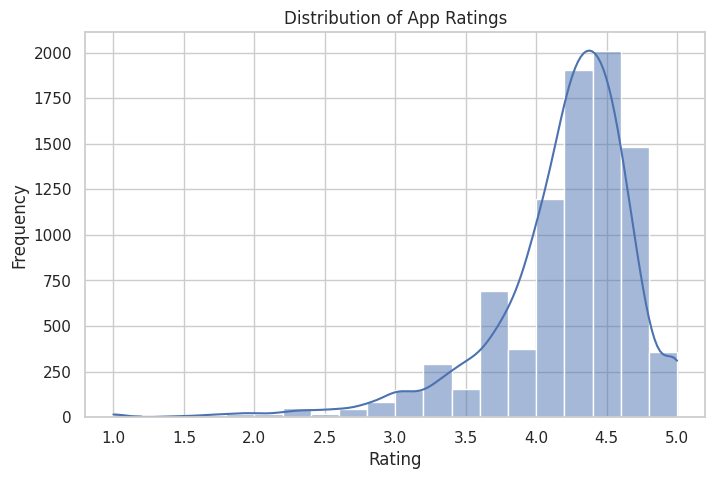

In [214]:
sns.set(style="whitegrid")

# Remove missing ratings
ratings = final_dataset['Rating'].dropna()

plt.figure(figsize=(8,5))
sns.histplot(ratings, bins=20, kde=True)

plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.show()


##### 1. Why did you pick the specific chart?

I chose a histogram because rating is a continuous numerical variable, and a histogram effectively shows how values are distributed across ranges.
It helps identify concentration, skewness, and overall patterns in app ratings, which is essential for understanding quality trends.


##### 2. What is/are the insight(s) found from the chart?

Most apps are rated between 4.0 and 4.6.

Very few apps fall below 3.0.

The distribution is negatively skewed (long tail toward lower ratings).

Ratings are heavily concentrated near the upper end.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

Strong overall platform reputation.

Users likely trust Play Store apps.

Indicates generally good app quality.

Concern:

Since most apps are highly rated, rating alone may not strongly differentiate apps.

Users may rely more on installs or reviews instead of ratings.

## Boxplot — Rating Spread & Outliers

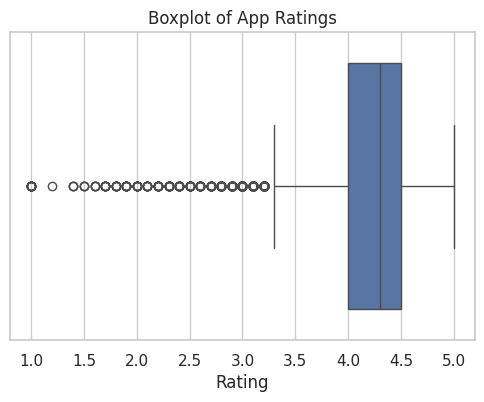

In [215]:

ratings = final_dataset['Rating'].dropna()

plt.figure(figsize=(6,4))
sns.boxplot(x=ratings)

plt.title("Boxplot of App Ratings")
plt.xlabel("Rating")

plt.show()

In [216]:
print("Mean Rating:", round(ratings.mean(), 2))
print("Median Rating:", round(ratings.median(), 2))
print("Standard Deviation:", round(ratings.std(), 2))
print("Skewness:", round(ratings.skew(), 2))


Mean Rating: 4.19
Median Rating: 4.3
Standard Deviation: 0.52
Skewness: -1.82


##### 1. Why did you pick the specific chart?

Boxplot

To detect outliers.

To understand rating consistency.

To see how tightly ratings are clustered.

##### 2. What is/are the insight(s) found from the chart?

Median rating is around 4.3.

Ratings are tightly packed between ~4.0 and 4.5.

Some low-rated outliers exist below 3.5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

Most apps maintain consistent quality.

Very few extremely poor-performing apps.

Concern:

Low-rated outliers may harm trust in specific categories.

Those categories may need stricter quality control.

#### Chart - 3

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Starter (<10K)'),
  Text(1, 0, 'Growing (10K–100K)'),
  Text(2, 0, 'Established (100K–1M)'),
  Text(3, 0, 'Popular (1M–10M)'),
  Text(4, 0, 'Market Leader (10M+)')])

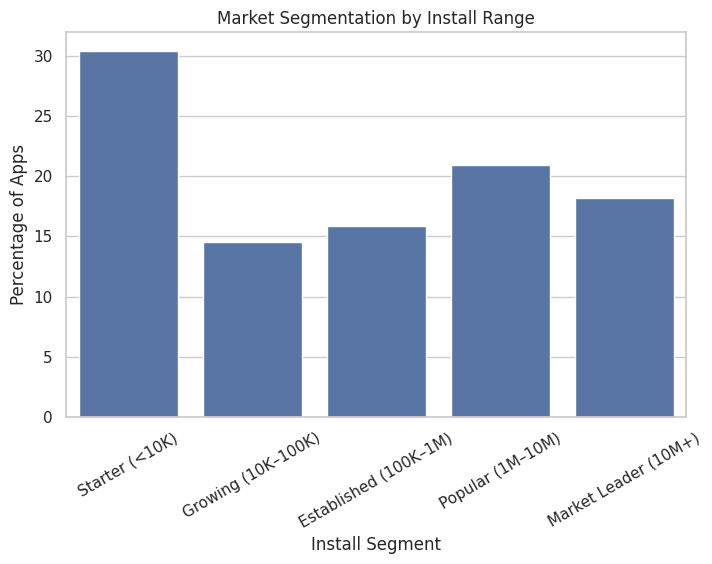

In [217]:
# Define install categories
def categorize_installs(x):
    if x < 10000:
        return "Starter (<10K)"
    elif x < 100000:
        return "Growing (10K–100K)"
    elif x < 1000000:
        return "Established (100K–1M)"
    elif x < 10000000:
        return "Popular (1M–10M)"
    else:
        return "Market Leader (10M+)"

# Apply categorization
final_dataset['Install_Segment'] = final_dataset['Installs'].apply(categorize_installs)

# Calculate percentage distribution
segment_percent = (
    final_dataset['Install_Segment']
    .value_counts(normalize=True) * 100
)

# Sort logically
segment_order = [
    "Starter (<10K)",
    "Growing (10K–100K)",
    "Established (100K–1M)",
    "Popular (1M–10M)",
    "Market Leader (10M+)"
]

segment_percent = segment_percent.reindex(segment_order)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=segment_percent.index, y=segment_percent.values)

plt.title("Market Segmentation by Install Range")
plt.xlabel("Install Segment")
plt.ylabel("Percentage of Apps")
plt.xticks(rotation=30)


##### 1. Why did you pick the specific chart?

A bar plot clearly compares the number of apps across different install segments, making it easier to understand market concentration and identify which segments dominate the Play Store ecosystem.

##### 2. What is/are the insight(s) found from the chart?

Most apps have very low install counts.

A very small number of apps dominate with extremely high installs.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive:

Massive opportunity exists for breakout apps.

Viral apps can achieve exponential growth.

Platform supports high scalability.

⚠️ Concern:

Market is highly competitive.

New apps may struggle to gain visibility.

Growth is not evenly distributed — a few apps capture most users.

#### Chart - 4

Text(0, 0.5, 'Percentage of Apps')

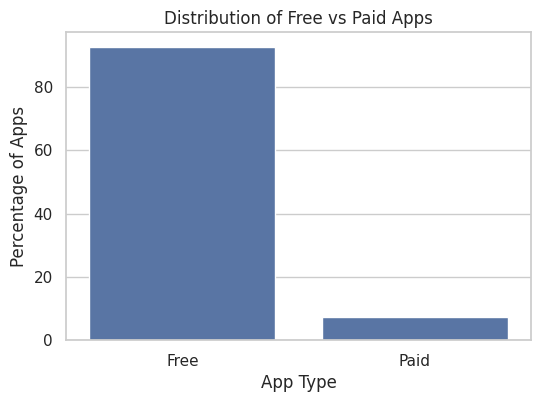

In [218]:

# Count Free vs Paid apps
type_counts = final_dataset['Type'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values)

plt.title("Distribution of Free vs Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Percentage of Apps")

##### 1. Why did you pick the specific chart?

I used a bar plot because Free and Paid apps are categorical variables, and bar charts are ideal for comparing counts or proportions across categories.

It provides a clear visual comparison of their distribution, helping assess market dominance and monetization patterns.

##### 2. What is/are the insight(s) found from the chart?

Over 90% of apps are Free.

Only a small portion (~7–8%) are Paid.

The platform is overwhelmingly free-driven

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Insights

Lower entry barrier for users → higher adoption.

Free apps scale faster and attract larger install volumes.

Strong ecosystem for ad-based and in-app purchase revenue models.

⚠️ Strategic Concern

Paid apps operate in a niche market.

Harder for paid apps to compete unless highly differentiated.

Revenue must rely heavily on volume-based monetization (ads, subscriptions)

#### Chart - 5

([0, 1, 2, 3],
 [Text(0, 0, 'Budget (<$2)'),
  Text(1, 0, 'Standard ($2–$5)'),
  Text(2, 0, 'Premium ($5–$10)'),
  Text(3, 0, 'High-End ($10+)')])

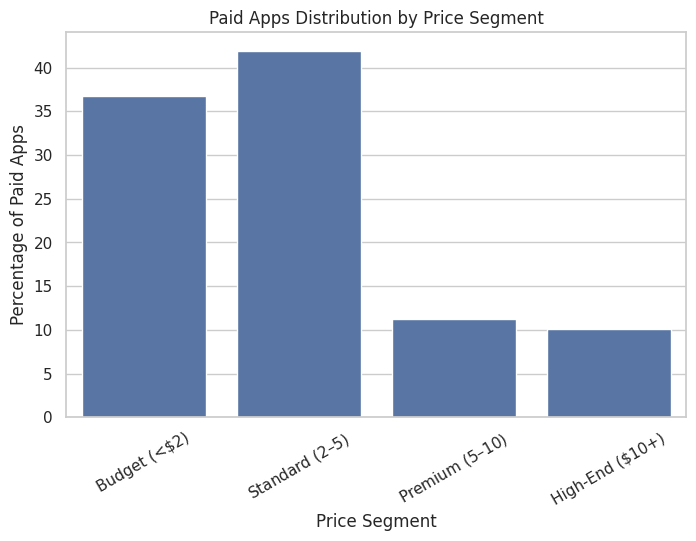

In [219]:
# Filter Paid apps safely
paid_apps = final_dataset[final_dataset['Type'] == 'Paid'].copy()

# Define price bands
def categorize_price(x):
    if x < 2:
        return "Budget (<$2)"
    elif x < 5:
        return "Standard ($2–$5)"
    elif x < 10:
        return "Premium ($5–$10)"
    else:
        return "High-End ($10+)"

paid_apps['Price_Segment'] = paid_apps['Price'].apply(categorize_price)

# Calculate percentage distribution
price_segment_percent = (
    paid_apps['Price_Segment']
    .value_counts(normalize=True) * 100
)

# Logical order
price_order = [
    "Budget (<$2)",
    "Standard ($2–$5)",
    "Premium ($5–$10)",
    "High-End ($10+)"
]

price_segment_percent = price_segment_percent.reindex(price_order)

plt.figure(figsize=(8,5))
sns.barplot(x=price_segment_percent.index, y=price_segment_percent.values)

plt.title("Paid Apps Distribution by Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Percentage of Paid Apps")
plt.xticks(rotation=30)


##### 1. Why did you pick the specific chart?

I used a bar plot because price segments are grouped categorical ranges rather than continuous values.

A bar chart clearly compares the number of paid apps in each price segment, making it easier to understand pricing concentration and dominant pricing strategies in the market.


##### 2. What is/are the insight(s) found from the chart?

Key Insights

~42% of paid apps fall in the Standard ($2–$5) range.

~37% are Budget (<$2).

Only ~11% are Premium ($5–$10).

Around ~10% are High-End ($10+).

This shows that nearly 80% of paid apps are priced below $5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Insights

Market favors affordable pricing.

Low-price strategy likely improves conversion rates.

Developers prefer volume-based monetization over high-margin pricing.

Clear psychological pricing band under $5.

⚠️ Strategic Insight

Premium and high-end segments are small.

Hard to justify high pricing unless the app offers strong differentiation.

Competitive pressure is highest in the <$5 range.

#### Chart - 6

Text(0, 0.5, 'Percentage of Reviews')

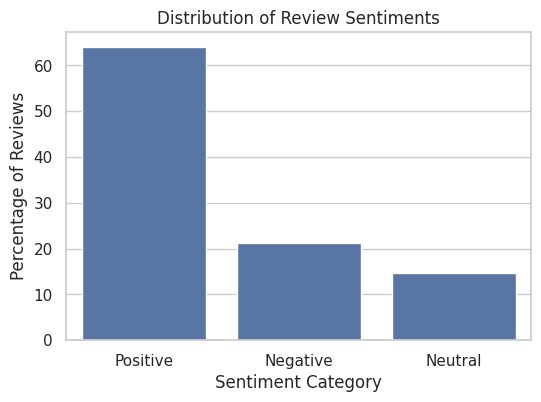

In [220]:
# Chart - 6 visualization code

# Remove missing sentiment values
sentiment_counts = review_data_clean['Sentiment'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

plt.title("Distribution of Review Sentiments")
plt.xlabel("Sentiment Category")
plt.ylabel("Percentage of Reviews")


##### 1. Why did you pick the specific chart?

Sentiment is a categorical variable (Positive, Negative, Neutral).

A bar chart is the most appropriate and clear way to compare proportions across categories.

##### 2. What is/are the insight(s) found from the chart?

~64% of reviews are Positive.

~21% are Negative.

~15% are Neutral.

Positive sentiment clearly dominates, but negative reviews are still significant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Impact

Strong majority of positive sentiment supports platform trust.

Confirms high average ratings observed earlier.

Indicates good overall user satisfaction.

⚠️ Potential Negative Impact

21% negative reviews is meaningful.

Negative sentiment can:

Reduce new user conversions

Lower app store ranking

Increase churn if issues persist

#### Chart - 7

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Growing (10K–100K)'),
  Text(1, 0, 'Established (100K–1M)'),
  Text(2, 0, 'Popular (1M–10M)'),
  Text(3, 0, 'Market Leader (10M+)'),
  Text(4, 0, 'Starter (<10K)')])

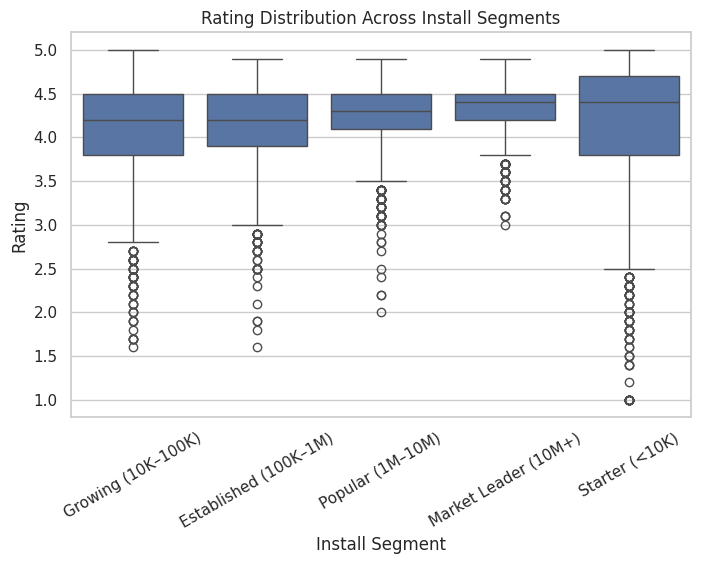

In [221]:
# Chart - 7 visualization code

plt.figure(figsize=(8,5))

sns.boxplot(
    x='Install_Segment',
    y='Rating',
    data=final_dataset
)

plt.title("Rating Distribution Across Install Segments")
plt.xlabel("Install Segment")
plt.ylabel("Rating")
plt.xticks(rotation=30)

##### 1. Why did you pick the specific chart?

We are comparing a continuous variable (Rating) across categorical segments (Install tiers).

A boxplot is ideal to:

Compare medians

Observe spread

Detect outliers

Understand distribution differences across groups

It gives a clear comparison of quality across growth levels.

##### 2. What is/are the insight(s) found from the chart?

Median rating slightly increases as install tier increases.

Popular (1M–10M) and Market Leader (10M+) apps have slightly higher median ratings (~4.4–4.5).

Starter apps (<10K installs) show:

Wider spread

More extreme low-rating outliers

Higher install tiers show more rating stability (narrower IQR).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Insight

Quality does correlate (slightly) with popularity.

Apps that maintain higher ratings are more likely to scale.

Strong user satisfaction supports growth.

⚠️ Strategic Insight

The difference in median ratings is not drastic.

This means rating alone does not fully explain install growth.

Other drivers likely matter:

Marketing

Brand trust

Category dominance

Early momentum

#### Chart - 8

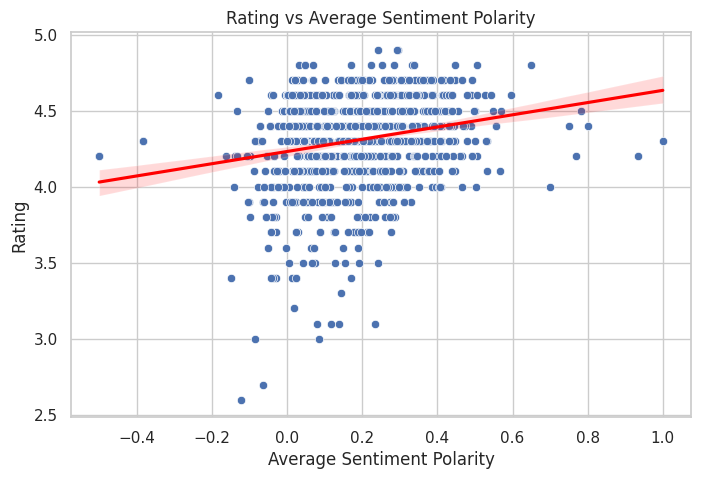

In [222]:
# Chart - 8 visualization code


plt.figure(figsize=(8,5))

sns.scatterplot(
    x='Avg_Sentiment_Polarity',
    y='Rating',
    data=final_dataset
)

sns.regplot(
    x='Avg_Sentiment_Polarity',
    y='Rating',
    data=final_dataset,
    scatter=False,
    color='red'
)

plt.title("Rating vs Average Sentiment Polarity")
plt.xlabel("Average Sentiment Polarity")
plt.ylabel("Rating")

plt.show()


##### 1. Why did you pick the specific chart?

Both Rating and Avg_Sentiment_Polarity are continuous variables.

A scatter plot is ideal to observe relationships between two numeric variables.

Adding a regression line helps identify trend direction and strength.

This helps validate whether sentiment truly reflects rating.

##### 2. What is/are the insight(s) found from the chart?

There is a clear positive relationship between sentiment polarity and rating.

As average sentiment becomes more positive, ratings tend to increase.

The regression line shows an upward trend.

However, there is still visible spread — meaning sentiment is not a perfect predictor.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Impact

Sentiment analysis can be used as an early quality signal.

Monitoring review polarity can help predict rating changes.

Useful for:

Product improvement

Customer support prioritization

Reputation management

⚠️ Strategic Insight

Relationship is moderate, not extremely strong.

Some apps have positive sentiment but average ratings.

Some apps have neutral sentiment but high ratings.

#### Chart - 9

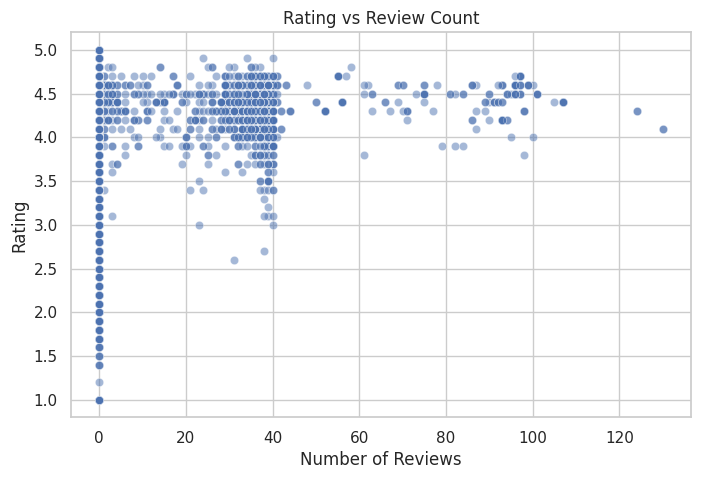

In [223]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    x='Review_Count',
    y='Rating',
    data=final_dataset,
    alpha=0.5
)

plt.title("Rating vs Review Count")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")

plt.show()


##### 1. Why did you pick the specific chart?

Both Review_Count and Rating are numeric variables.

A scatter plot is ideal to examine relationships between two continuous variables.

It helps detect:

Rating stability

Bias in low-review apps

Whether popularity stabilizes quality perception

##### 2. What is/are the insight(s) found from the chart?

Apps with very low review counts show extreme rating variation (1.0 to 5.0).

As review count increases, ratings become more stable.

High-review apps mostly cluster between 4.0 and 4.6.

Very few high-review apps have extremely low ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Insight

High review volume improves rating credibility.

Popular apps tend to maintain consistent quality perception.

Review count can act as a trust signal.

⚠️ Strategic Concern

New apps with few reviews can show artificially high or low ratings.

Early-stage rating bias may mislead users.

Platform algorithms should consider review volume when ranking apps.

#### Chart - 10

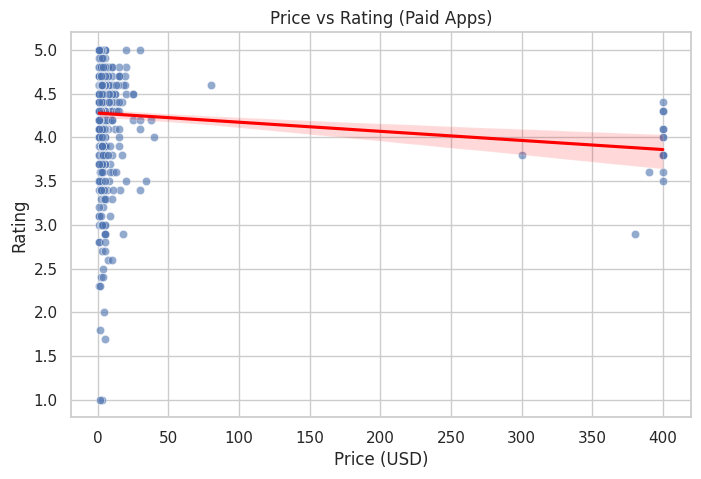

In [224]:
# Chart - 10 visualization code
# Use paid apps only
paid_apps = final_dataset[final_dataset['Type'] == 'Paid']

plt.figure(figsize=(8,5))

sns.scatterplot(
    x='Price',
    y='Rating',
    data=paid_apps,
    alpha=0.6
)

sns.regplot(
    x='Price',
    y='Rating',
    data=paid_apps,
    scatter=False,
    color='red'
)

plt.title("Price vs Rating (Paid Apps)")
plt.xlabel("Price (USD)")
plt.ylabel("Rating")

plt.show()


##### 1. Why did you pick the specific chart?

Both Price and Rating are continuous variables.

A scatter plot helps observe whether higher pricing aligns with higher quality perception.

A regression line helps identify the direction of relationship.

##### 2. What is/are the insight(s) found from the chart?

The trendline shows a slight negative relationship.

Higher-priced apps do not have higher ratings.

Most highly rated paid apps are priced in the lower range.

Extremely high-priced apps ($300–$400 range) do not show superior ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Strategic Insight

Premium pricing does not automatically translate into higher perceived quality.

Users may be more price-sensitive in the paid segment.

Competitive advantage likely comes from value, not price.

⚠️ Growth Concern

Overpricing without clear differentiation may reduce adoption.

High pricing could limit review volume and rating credibility.

#### Chart - 11

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Starter (<10K)'),
  Text(1, 0, 'Growing (10K–100K)'),
  Text(2, 0, 'Established (100K–1M)'),
  Text(3, 0, 'Popular (1M–10M)'),
  Text(4, 0, 'Market Leader (10M+)')])

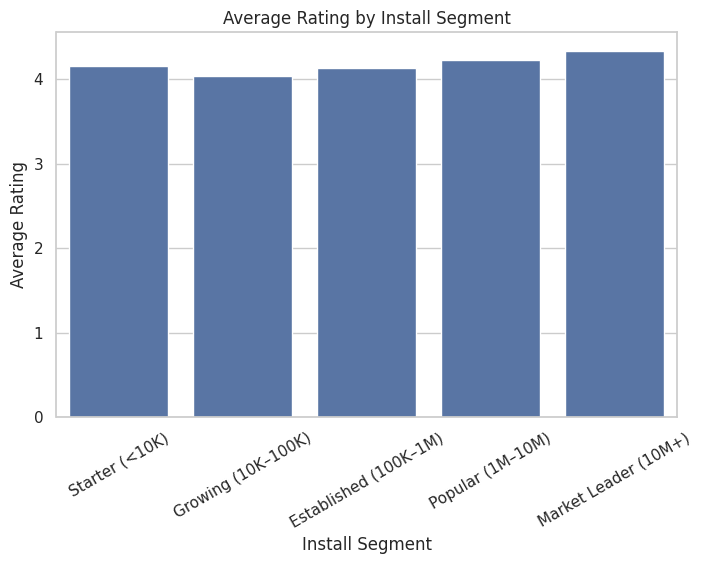

In [225]:

# Calculate average rating per install segment
avg_rating_by_segment = (
    final_dataset
    .groupby('Install_Segment')['Rating']
    .mean()
    .reindex([
        "Starter (<10K)",
        "Growing (10K–100K)",
        "Established (100K–1M)",
        "Popular (1M–10M)",
        "Market Leader (10M+)"
    ])
)

plt.figure(figsize=(8,5))

sns.barplot(
    x=avg_rating_by_segment.index,
    y=avg_rating_by_segment.values
)

plt.title("Average Rating by Install Segment")
plt.xlabel("Install Segment")
plt.ylabel("Average Rating")
plt.xticks(rotation=30)


##### 1. Why did you pick the specific chart?

We want to compare average ratings across growth tiers.

Install_Segment is categorical, Rating is numeric.

A bar chart of averages is simple, clear, and ideal for non-technical stakeholders

##### 2. What is/are the insight(s) found from the chart?

Average rating gradually increases as install tier increases.

Starter apps (<10K) have slightly lower average ratings.

Market Leaders (10M+) show the highest average ratings.

The difference is visible but not drastic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Insight

Higher-rated apps tend to scale better.

User satisfaction likely supports sustained growth.

Maintaining strong ratings is strategically important for scaling.

⚠️ Important Observation

The difference in average ratings across segments is small (all around ~4.0–4.4).

This suggests rating alone does not fully explain install growth.

Other factors (marketing, category demand, brand trust) also play major roles.

#### Chart - 12

Text(0, 0.5, 'Category')

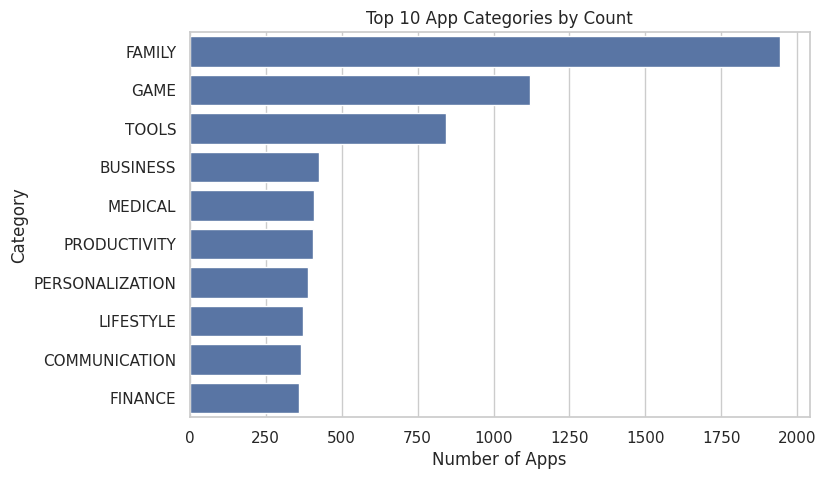

In [226]:
top_categories = (
    final_dataset['Category']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,5))

sns.barplot(
    x=top_categories.values,
    y=top_categories.index
)

plt.title("Top 10 App Categories by Count")
plt.xlabel("Number of Apps")
plt.ylabel("Category")

##### 1. Why did you pick the specific chart?

Category is a categorical variable.

We want to compare frequency counts.

A horizontal bar chart:

Clearly ranks categories.

Handles long category names better.

Makes competitive concentration instantly visible.

Best visualization for comparing discrete group sizes.

##### 2. What is/are the insight(s) found from the chart?

FAMILY category dominates significantly.

GAME is the second largest segment.

TOOLS and BUSINESS also show strong presence.

Several categories have moderate but similar app counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifies high-demand categories (FAMILY, GAME).

Helps investors or developers identify:

Large market segments

High user activity zones

#### Chart - 13

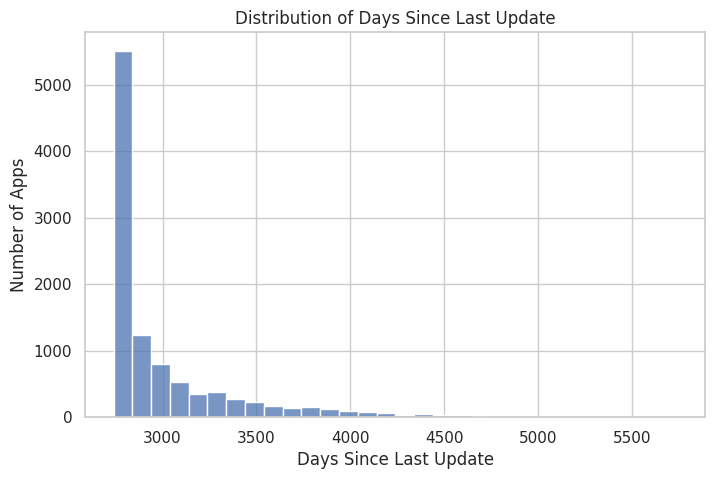

In [227]:
# Chart - 13 visualization code
import pandas as pd
from datetime import datetime

# Ensure Last Updated is datetime
final_dataset['Last Updated'] = pd.to_datetime(final_dataset['Last Updated'])

# Create recency feature
today = pd.to_datetime("today")
final_dataset['Days_Since_Update'] = (today - final_dataset['Last Updated']).dt.days

plt.figure(figsize=(8,5))

sns.histplot(final_dataset['Days_Since_Update'], bins=30)

plt.title("Distribution of Days Since Last Update")
plt.xlabel("Days Since Last Update")
plt.ylabel("Number of Apps")

plt.show()


##### 1. Why did you pick the specific chart?

Days_Since_Update is a continuous numeric variable.

A histogram:

Shows distribution pattern.

Detects skewness.

Identifies maintenance gaps.

Ideal for understanding lifecycle activity across apps.

##### 2. What is/are the insight(s) found from the chart?

Distribution is heavily right-skewed.

Large number of apps have not been updated in a long time.

Few apps are recently updated.

There is a long tail of outdated apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifies opportunity:

Active, regularly updated apps can outperform stale competitors.

Suggests maintenance is a competitive advantage.

Answer Here

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap - Numeric Variables')

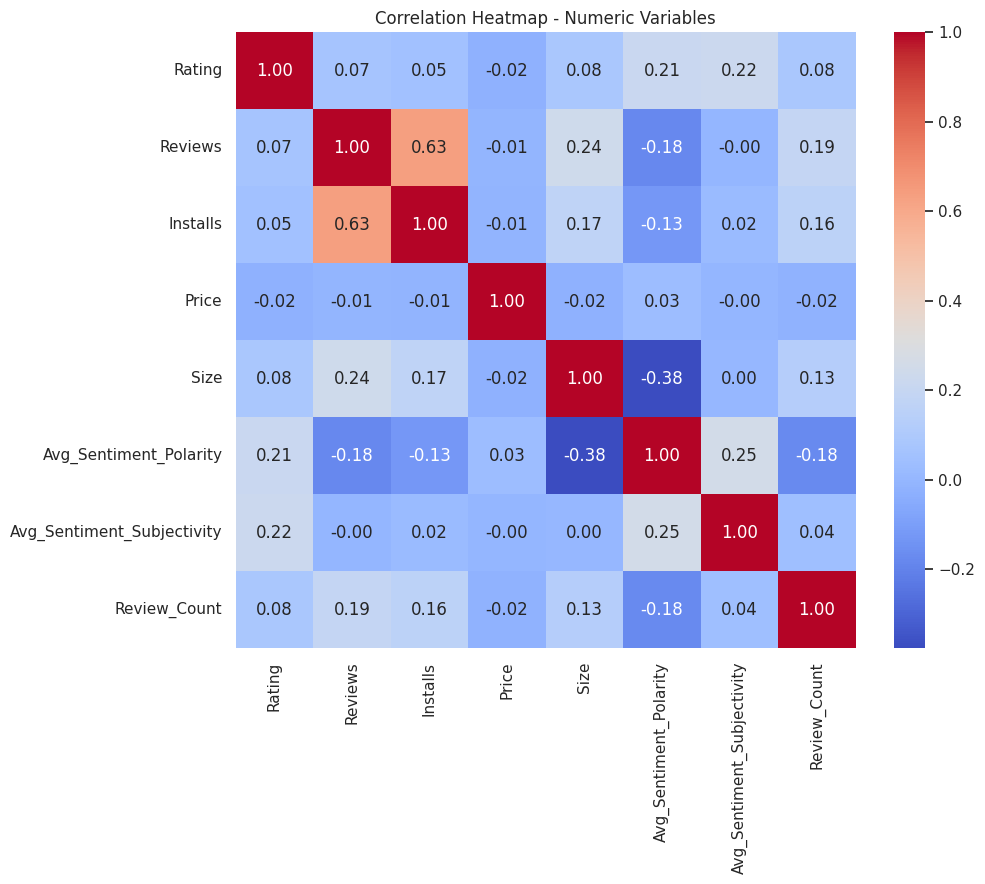

In [228]:
# Chart - 12 visualization code
# Select numeric columns
numeric_cols = [
    'Rating',
    'Reviews',
    'Installs',
    'Price',
    'Size',
    'Avg_Sentiment_Polarity',
    'Avg_Sentiment_Subjectivity',
    'Review_Count'
]

corr_matrix = final_dataset[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap - Numeric Variables")

##### 1. Why did you pick the specific chart?

A correlation heatmap helps:

Identify strongest relationships

Detect growth drivers

Separate meaningful signals from noise

Avoid relying on assumptions

##### 2. What is/are the insight(s) found from the chart?

1. Reviews ↔ Installs (0.63) — Strong Positive Correlation

This is the strongest relationship in the matrix.

Apps with more installs have significantly more reviews.

✅ Business Meaning:

Popularity drives engagement.

High-install apps generate more user interaction.

Review volume is strongly tied to scale.
🔥 2. Rating ↔ Sentiment Polarity (~0.21)

Moderate positive correlation.

Confirms sentiment analysis aligns with ratings.

✅ Business Meaning:

Sentiment can be used as an early indicator of rating trends.

Text analytics adds measurable value.

🔥 3. Size ↔ Sentiment Polarity (-0.38)

Moderate negative relationship.

Larger apps tend to have slightly more negative sentiment.

⚠️ Business Meaning:

Heavy apps may impact performance or user experience.

Optimization matters.

🔥 4. Price ↔ Rating (~ -0.02)

Essentially no meaningful correlation.

✅ Business Meaning:

Pricing does not drive perceived quality.

Users judge apps on value, not cost.

🔥 5. Rating ↔ Installs (0.05)

Very weak correlation.

⚠️ Critical Insight:

Rating alone does not drive installs.

Growth depends on multiple factors.

Freemium-dominated

Highly competitive at entry level

Pyramid-structured in installs

Driven by engagement, not pricing

Influenced by sentiment and user experience

#### Chart - 15 - Pair Plot

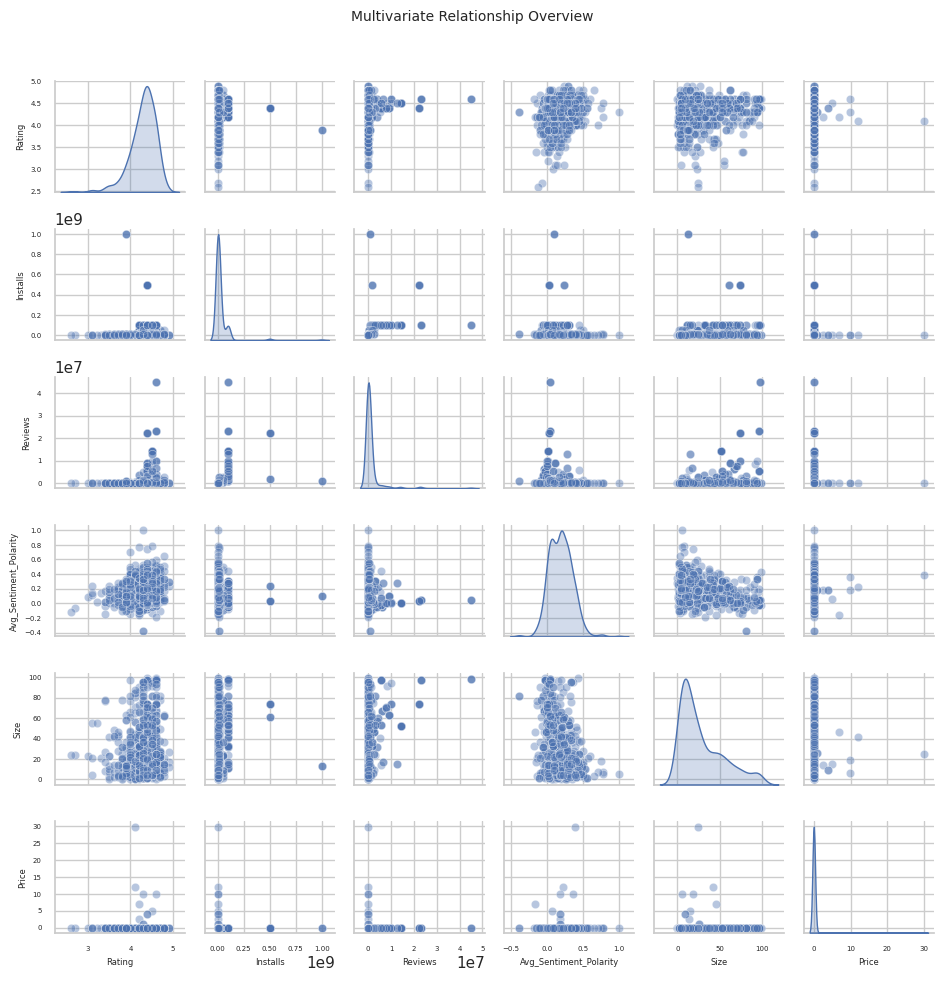

In [229]:
pairplot_features = final_dataset[
    [
        'Rating',
        'Installs',
        'Reviews',
        'Avg_Sentiment_Polarity',
        'Size',
        'Price'
    ]
].dropna()

# Create compact pairplot
g = sns.pairplot(
    pairplot_features,
    diag_kind='kde',
    plot_kws={'alpha': 0.4},
    height=1.6  # Smaller subplot size
)

# Reduce label font size
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)
        ax.tick_params(labelsize=5)

plt.suptitle("Multivariate Relationship Overview", y=1.02, fontsize=10)
plt.tight_layout()
g.fig.savefig("pairplot_multivariate_analysis.png", dpi=300, bbox_inches="tight")


##### 1. Why did you pick the specific chart?

I selected a pairplot because it provides a comprehensive multivariate view of relationships between all key numerical variables in a single visualization. Instead of analyzing rating, installs, reviews, sentiment, size, and price separately, the pairplot allows simultaneous comparison of distributions and pairwise relationships.

This is particularly useful in exploratory data analysis because it helps identify correlations, clusters, skewness, outliers, and potential patterns that may influence app performance. It acts as a high level diagnostic tool before moving toward deeper statistical or predictive modeling.

##### 2. What is/are the insight(s) found from the chart?

The Play Store market follows a power law distribution where a small number of apps dominate installs and reviews.

Free apps drive the majority of installs, confirming that freemium or ad supported models are strategically more scalable.

Sentiment polarity aligns with ratings, meaning user text reviews are reliable indicators of satisfaction.

Reviews strongly correlate with installs, making review count a strong performance metric.

Rating alone does not determine installs, suggesting that visibility, brand, and category also influence success.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

The primary objective of this analysis was to identify the key factors that drive app success on the Google Play Store and translate those findings into actionable business strategies. Based on the exploratory analysis and multivariate relationships observed, the solution can be structured around the following strategic directions:

First, the market is heavily skewed toward free applications. Free apps dominate install volume across almost all categories, while paid apps represent a much smaller share of total downloads. This clearly indicates that a freemium or ad supported monetization model is more scalable compared to a purely paid model. Businesses aiming for rapid user acquisition should prioritize free entry with in app monetization strategies.

Second, installs and reviews show a strong positive relationship. Apps with higher installs naturally accumulate more reviews, which further increases credibility and visibility. This suggests that early growth campaigns, marketing push, and user acquisition strategies are critical. Increasing installs in the early phase can create a compounding effect through review generation and algorithmic ranking improvements.

Third, rating alone does not strongly determine install volume. Most apps are already clustered in the 4.0 to 4.5 range, which reduces rating as a strong differentiator. This means businesses must focus not only on maintaining good ratings but also on brand positioning, user experience, and category competition to stand out.

Fourth, sentiment polarity aligns with star ratings. Apps with more positive textual sentiment generally maintain higher ratings. This validates the use of sentiment analysis as a monitoring tool. Businesses can actively analyze user reviews to detect dissatisfaction signals early and improve product features accordingly.

Fifth, app size does not show a strong impact on ratings or installs. However, extremely large apps may affect accessibility in low storage or low bandwidth markets. Therefore, optimization remains important, especially in emerging markets.

Overall, success is influenced by a combination of monetization model, user acquisition strategy, engagement level, and continuous feedback improvement rather than a single variable.

# **Conclusion**

The Google Play Store ecosystem follows a highly competitive and concentrated structure where a small number of apps dominate installs and engagement. The analysis demonstrates that free apps drive scale, installs drive reviews, and sentiment supports rating credibility. However, high ratings alone do not guarantee market success.

From a business standpoint, the optimal strategy involves launching with a free or freemium model, investing in early user acquisition, closely monitoring user sentiment, and continuously improving based on feedback. Sustainable growth depends more on engagement and scalability strategies than on rating optimization alone.

This exploratory analysis provides a strong foundation for further steps such as correlation analysis, predictive modeling, or segmentation modeling to quantify drivers of app success more precisely.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***